# Clickbait Analysis

In [170]:
# Import Packages

import math
import string
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import warnings
warnings.simplefilter('ignore')

In [2]:
# Import datasets as Pandas DataFrames

clickbait_df = pd.read_excel('../data/clickbait_final.xlsx')
corpus_df = pd.read_excel('../data/corpus.xlsx')

In [3]:
clickbait_df.head()

,title,clickbait,caps_ratio,exclamation,question
0,"Please don't saved you a click us, you guys.",1,0.166667,0,0
1,IsConnor McGregor Hinting at a Possible Fight ...,1,1.285714,0,1
2,"How Hillary Clinton Sill Can, And Should, Beco...",1,1.090909,0,0
3,The internet has nominated the Twitter employe...,1,0.545455,0,0
4,The Reason Cops Touch Your Car’s Taillight Whe...,1,1.000000,0,0


In [4]:
corpus_df.head()

,clickbait,corpus
0,1,please
1,1,don't
2,1,saved
3,1,click
4,1,us


In [5]:
cb_caps = clickbait_df[clickbait_df['clickbait'] == 1]['caps_ratio']
ncb_caps = clickbait_df[clickbait_df['clickbait'] == 0]['caps_ratio']

In [16]:
ave_cb_caps = np.median(cb_caps)
print('The average capitalization ratio for clickbait titles is: ' + 
      str(round(ave_cb_caps, 2)))

The average capitalization ratio for clickbait titles is: 1.0


In [17]:
ave_ncb_caps = np.median(ncb_caps)
print('The average capitalization ratio for non-clickbait titles is: ' + 
      str(round(ave_ncb_caps, 2)))

The average capitalization ratio for non-clickbait titles is: 0.38


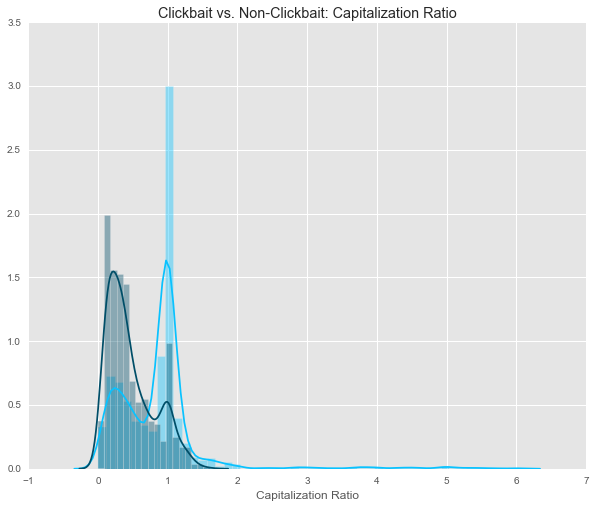

In [40]:
plt.figure(figsize=(10, 8))
plt.title('Clickbait vs. Non-Clickbait: Capitalization Ratio')
sns.distplot(cb_caps, kde = True, color = '#09C2FF')
sns.distplot(ncb_caps, kde = True, color = '#004E68')
plt.xlabel('Capitalization Ratio')

In [18]:
cb_questions = clickbait_df[clickbait_df['clickbait'] == 1]['question']
ncb_questions = clickbait_df[clickbait_df['clickbait'] == 0]['question']

In [28]:
cb_question_percentage = sum(cb_questions)/len(cb_questions)
print('The percentage of clickbait titles that are questions is: ' +
     str(round(cb_question_percentage * 100, 2)) + '%')

The percentage of clickbait titles that are questions is: 16.1%


In [30]:
ncb_question_percentage = sum(ncb_questions)/len(ncb_questions)
print('The percentage of non-clickbait titles that are questions is: ' +
     str(round(ncb_question_percentage * 100, 3)) + '%')

The percentage of non-clickbait titles that are questions is: 0.302%


([<matplotlib.axis.XTick at 0x115d97128>,
 <a list of 2 Text xticklabel objects>)

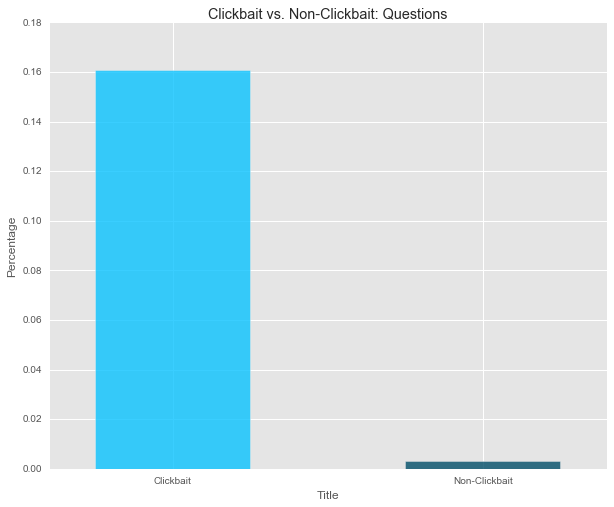

In [42]:
plt.figure(figsize=(10, 8))
plt.title('Clickbait vs. Non-Clickbait: Questions')
plt.bar(
    np.arange(2),
    [cb_question_percentage, ncb_question_percentage],
    align = 'center', 
    width = 0.5,
    alpha = 0.8,
    color = ['#09C2FF', '#004E68']
)
plt.xlabel('Title')
plt.ylabel('Percentage')
plt.xticks(np.arange(2), ['Clickbait', 'Non-Clickbait'])

In [19]:
cb_exclamations = clickbait_df[clickbait_df['clickbait'] == 1]['exclamation']
ncb_exclamations = clickbait_df[clickbait_df['clickbait'] == 0]['exclamation']

In [45]:
cb_exclamations_percentage = sum(cb_exclamations)/len(cb_exclamations)
print('The percentage of clickbait titles that are questions is: ' +
     str(round(cb_exclamations_percentage * 100, 2)) + '%')

The percentage of clickbait titles that are questions is: 7.75%


In [46]:
ncb_exclamations_percentage = sum(ncb_exclamations)/len(ncb_exclamations)
print('The percentage of non-clickbait titles that are questions is: ' +
     str(round(ncb_exclamations_percentage * 100, 3)) + '%')

The percentage of non-clickbait titles that are questions is: 0.0%


([<matplotlib.axis.XTick at 0x11695fa58>,
 <a list of 2 Text xticklabel objects>)

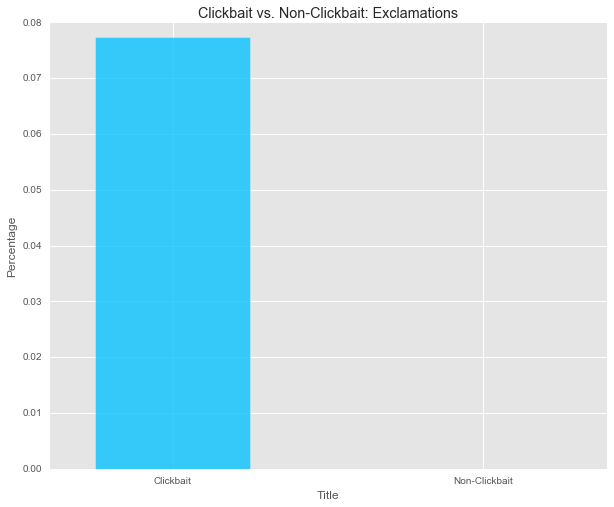

In [47]:
plt.figure(figsize=(10, 8))
plt.title('Clickbait vs. Non-Clickbait: Exclamations')
plt.bar(
    np.arange(2),
    [cb_exclamations_percentage, ncb_exclamations_percentage],
    align = 'center', 
    width = 0.5,
    alpha = 0.8,
    color = ['#09C2FF', '#004E68']
)
plt.xlabel('Title')
plt.ylabel('Percentage')
plt.xticks(np.arange(2), ['Clickbait', 'Non-Clickbait'])

In [67]:
def log_ratio(df, term_column = 'corpus', clickbait_indicator = 'clickbait'):
    """
    Find the frequency of words from clickbait tiles relative to non-clickbait titles
    """
    log_ratios = []
    cb_df = df[df[clickbait_indicator] == 1]
    ncb_df = df[df[clickbait_indicator] == 0]
    total_cb_corpus = len(cb_df) + 1
    total_ncb_corpus = len(ncb_df) + 1
    for term in df[term_column]:
        term_frequency_cb = (len(cb_df[cb_df[term_column] == term]) + 1)/total_cb_corpus
        term_frequency_ncb = (len(ncb_df[ncb_df[term_column] == term]) + 1)/total_ncb_corpus
        log_ratios += [math.log2(term_frequency_cb/term_frequency_ncb)]
    return log_ratios

In [69]:
log_ratios = log_ratio(corpus_df)

In [72]:
corpus_df['log_ratios'] = log_ratios

In [76]:
final_corpus_df=corpus_df.drop_duplicates().sort_values(by = ['log_ratios'], ascending = False)

In [81]:
most_likely_cb = final_corpus_df[final_corpus_df['clickbait'] == 1].head(20)
most_likely_cb

,clickbait,corpus,log_ratios
167,1,what,6.852069
115,1,here's,5.568276
340,1,why,5.470979
44,1,you,5.305242
13,1,how,4.998910
150,1,this,4.912611
168,1,happened,4.799602
528,1,did,4.799602
187,1,here’s,4.688570
69,1,looks,4.629677


In [82]:
least_likely_cb = final_corpus_df[final_corpus_df['clickbait'] == 0].tail(20)
least_likely_cb

,clickbait,corpus,log_ratios
10145,0,marijuana,-3.540248
10144,0,medical,-3.540248
10160,0,reports,-3.540248
10270,0,protest,-3.540248
9616,0,fired,-3.540248
9617,0,federal,-3.540248
9702,0,california,-3.655726
9805,0,russian,-3.655726
11494,0,killed,-3.655726
10240,0,united,-3.655726


In [101]:
concatenated_corpus_df = pd.concat([most_likely_cb, least_likely_cb])

([<matplotlib.axis.YTick at 0x11977e9b0>,
 <a list of 40 Text yticklabel objects>)

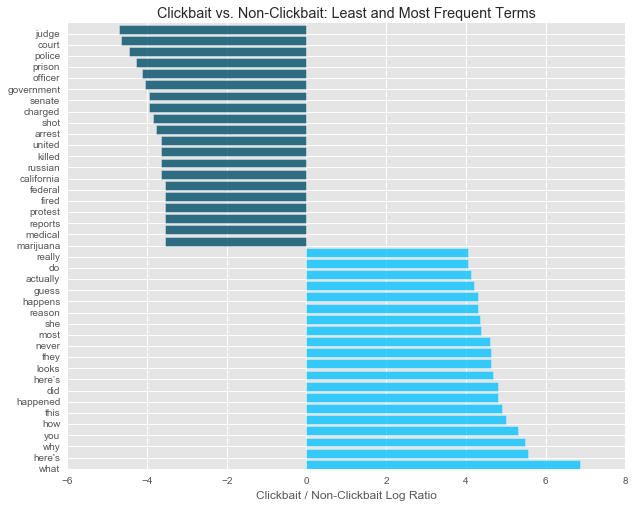

In [105]:
plt.figure(figsize=(10, 8))
color_scheme = []
least_likely = ['#09C2FF'] * 20 
most_likely = ['#004E68'] * 20
color_scheme += least_likely
color_scheme += most_likely
plt.title('Clickbait vs. Non-Clickbait: Least and Most Frequent Terms')
plt.barh(
    np.arange(len(most_likely_cb) + len(least_likely_cb)),
    most_likely_cb['log_ratios'].append(least_likely_cb['log_ratios']),
    alpha = 0.8,
    color = color_scheme
)
plt.xlabel('Clickbait / Non-Clickbait Log Ratio')
plt.yticks(np.arange(40), concatenated_corpus_df['corpus'])

In [120]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    clickbait_df[['caps_ratio', 'exclamation', 'question']],
    clickbait_df['clickbait'],
    random_state = 42,
    test_size = 0.2
)

In [156]:
# Logistic Regression Classification
logistic_regression = LogisticRegression()
logistic_regression = logistic_regression.fit(X_train, y_train)
logistic_regression.score(X_train, y_train)

0.7383647798742138

In [158]:
# Logistic Regression Holdout Test
print('The Logistic Regression classifier performed with a '+ 
      str(sum(logistic_regression.predict(X_test) == np.array(y_test))/len(y_test) * 100) + 
      '% accuracy on test data')

The Logistic Regression classifier performed with a 77.1356783919598% accuracy on test data


In [151]:
# Random Forest Classification
random_forest = RandomForestClassifier()
random_forest = random_forest.fit(X_train, y_train)
random_forest.score(X_train, y_train)

0.7647798742138365

In [154]:
# Random Forest Holdout Test
print('The Random Forest classifier performed with a '+ 
      str(sum(random_forest.predict(X_test) == np.array(y_test))/len(y_test) * 100) + 
      '% accuracy on test data')

The Random Forest classifier performed with a 77.63819095477386% accuracy on test data


In [159]:
# Preparing data for Naive Bayes Classification
stemmer = PorterStemmer()
processed_titles = []
for title in clickbait_df['title']:
    temp_np_title = title.strip(string.punctuation).split()
    np_title = [word.strip(string.punctuation) for word in temp_np_title]
    corpus = [word for word in np_title if word not in set(stopwords.words('english'))]
    lower_corpus = [word.lower() for word in corpus]
    final_corpus = [stemmer.stem(word) for word in lower_corpus]
    processed_titles += [' '.join(final_corpus)]
processed_titles = np.array(processed_titles)

In [163]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    processed_titles, 
    clickbait_df['clickbait'],
    random_state = 42,
    test_size = 0.2
)

In [182]:
# Naive Bayes Classification
naive_bayes_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('multinomialnb', MultinomialNB())]
)
naive_bayes = naive_bayes_pipeline.fit(X_train_nb, y_train_nb)
naive_bayes.score(X_train_nb, y_train_nb)

0.9861635220125786

In [185]:
# Naive Bayes Holdout Test
print('The Naive Bayes classifier performed with a '+ 
      str(sum(naive_bayes.predict(X_test_nb) == np.array(y_test_nb))/len(y_test_nb) * 100) + 
      '% accuracy on test data')

The Naive Bayes classifier performed with a 89.9497487437186% accuracy on test data
